## Time Series: Climate Data
![climate](https://images.pexels.com/photos/2969/climate-cold-glacier-iceberg.jpg?auto=compress&cs=tinysrgb&dpr=2&h=750&w=1260)
**Objectives:**
- list methods to adjust data for time series
- define the vocabulary of lagging, moving averages, and differencing
- replicate the process in google sheets and in python

**Question**: What are numbers we'd want to model over time?

**Problem:** All our tools aren't natively prepared to handle time series data. We need to make a lot of adjustments to our data. 

### Set up environment and tool set 

In [142]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = [16, 3]
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels

import scipy
from scipy.stats import pearsonr

from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
print(matplotlib.__version__)
print(pd.__version__)
print(np.__version__)
print(statsmodels.__version__)
print(scipy.__version__)

3.1.0
0.24.2
1.16.4
0.10.0
1.2.1


Data obtained from `https://datahub.io/core/global-temp#data`<br>
Looks like original source is obtained from `https://www.ncdc.noaa.gov/cag/global/time-series`

Data are included from the GISS Surface Temperature (GISTEMP) analysis and the global component of Climate at a Glance (GCAG)

### Obtain and visualize data

In [3]:
## data obtained from https://datahub.io/core/global-temp#data
df = pd.read_csv("https://pkgstore.datahub.io/core/global-temp/annual_csv/data/a26b154688b061cdd04f1df36e4408be/annual_csv.csv")
df.head()

,Source,Year,Mean
0,GCAG,2016,0.9363
1,GISTEMP,2016,0.9900
2,GCAG,2015,0.8998
3,GISTEMP,2015,0.8700
4,GCAG,2014,0.7408


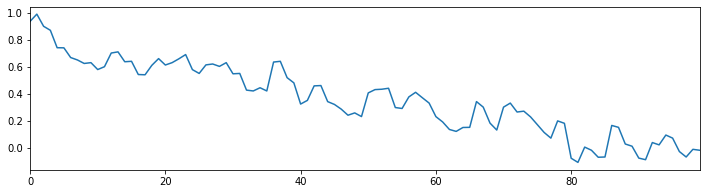

In [8]:
df.Mean[:100].plot()

### Exercise: what is wrong with the data and plot above? How can we fix this?

In [9]:
df = df.pivot(index='Year', columns='Source', values='Mean')

In [10]:
df.head()

Source,GCAG,GISTEMP
Year,,
1880,-0.1148,-0.20
1881,-0.0628,-0.12
1882,-0.0648,-0.10
1883,-0.1424,-0.21
1884,-0.2009,-0.28


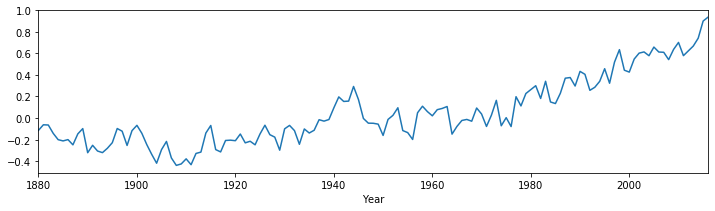

In [11]:
df.GCAG.plot()

In [12]:
type(df.index)

pandas.core.indexes.numeric.Int64Index

### Exercise: how can we make the index more time aware?

In [13]:
df.index = pd.to_datetime(df.index, format='%Y')

In [14]:
df.head()

Source,GCAG,GISTEMP
Year,,
1880-01-01,-0.1148,-0.20
1881-01-01,-0.0628,-0.12
1882-01-01,-0.0648,-0.10
1883-01-01,-0.1424,-0.21
1884-01-01,-0.2009,-0.28


In [15]:
type(df.index)

pandas.core.indexes.datetimes.DatetimeIndex

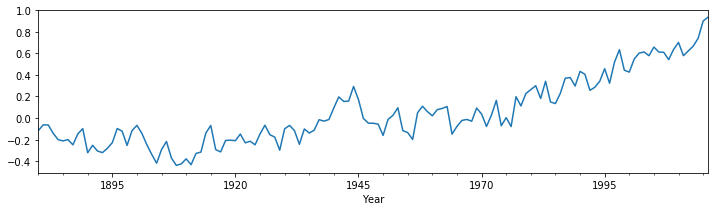

In [16]:
df.GCAG.plot()

In [17]:
df['1880']

Source,GCAG,GISTEMP
Year,,
1880-01-01,-0.1148,-0.2


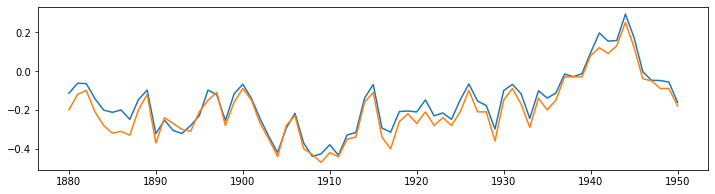

In [18]:
plt.plot(df['1880':'1950'][['GCAG', 'GISTEMP']])

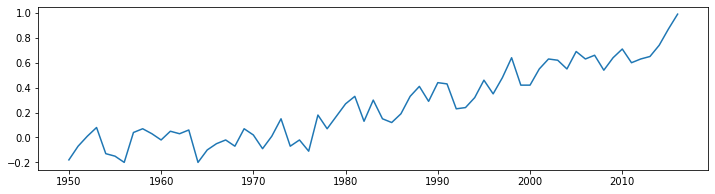

In [19]:
plt.plot(df['1950':][['GISTEMP']])

## Logging

`np.log()`

In [20]:
df['GISTEMP_log'] = np.log(df.GISTEMP)

C:\Users\Rocio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


In [21]:
df['GCAG_log'] = np.log(df.GCAG)
df.tail(10)

C:\Users\Rocio\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in log
  """Entry point for launching an IPython kernel.


Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log
Year,,,,
2007-01-01,0.6100,0.66,-0.415515,-0.494296
2008-01-01,0.5419,0.54,-0.616186,-0.612674
2009-01-01,0.6367,0.64,-0.446287,-0.451457
2010-01-01,0.7014,0.71,-0.342490,-0.354677
2011-01-01,0.5788,0.60,-0.510826,-0.546798
2012-01-01,0.6240,0.63,-0.462035,-0.471605
2013-01-01,0.6679,0.65,-0.430783,-0.403617
2014-01-01,0.7408,0.74,-0.301105,-0.300025
2015-01-01,0.8998,0.87,-0.139262,-0.105583


## Lagging

`shift()` [shift documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.shift.html)

Looks at what observations you had the prior unit of time (t-1) or two units of time ago (t-2)

To do this, you need to make sure that it is fully sorted by time

In [1]:
df['GCAG_lag1'] = df.GCAG.shift()

NameError: name 'df' is not defined

In [23]:
df.head()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1
Year,,,,,
1880-01-01,-0.1148,-0.20,NaN,NaN,NaN
1881-01-01,-0.0628,-0.12,NaN,NaN,-0.1148
1882-01-01,-0.0648,-0.10,NaN,NaN,-0.0628
1883-01-01,-0.1424,-0.21,NaN,NaN,-0.0648
1884-01-01,-0.2009,-0.28,NaN,NaN,-0.1424


In [24]:
(df.GCAG.shift(2)).head()

Year
1880-01-01       NaN
1881-01-01       NaN
1882-01-01   -0.1148
1883-01-01   -0.0628
1884-01-01   -0.0648
Name: GCAG, dtype: float64

In [25]:
df['GISTEMP_lag1'] = df.GISTEMP.shift()
df.head()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GISTEMP_lag1
Year,,,,,,
1880-01-01,-0.1148,-0.20,NaN,NaN,NaN,NaN
1881-01-01,-0.0628,-0.12,NaN,NaN,-0.1148,-0.20
1882-01-01,-0.0648,-0.10,NaN,NaN,-0.0628,-0.12
1883-01-01,-0.1424,-0.21,NaN,NaN,-0.0648,-0.10
1884-01-01,-0.2009,-0.28,NaN,NaN,-0.1424,-0.21


In [26]:
df['GCAG_lag2'] = df.GCAG.shift(2)
df['GCAG_lag3'] = df.GCAG.shift(3)
df['GCAG_lag4'] = df.GCAG.shift(4)

In [27]:
df[["GCAG", "GCAG_lag1", "GCAG_lag2", "GCAG_lag3", "GCAG_lag4"]].corr()

Source,GCAG,GCAG_lag1,GCAG_lag2,GCAG_lag3,GCAG_lag4
Source,,,,,
GCAG,1.000000,0.946235,0.911005,0.898884,0.898513
GCAG_lag1,0.946235,1.000000,0.942859,0.907034,0.895385
GCAG_lag2,0.911005,0.942859,1.000000,0.940571,0.903916
GCAG_lag3,0.898884,0.907034,0.940571,1.000000,0.938279
GCAG_lag4,0.898513,0.895385,0.903916,0.938279,1.000000


Shows a lot of correlation with prior years


## Differencing

`diff()` [diff documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.diff.html)

#### First order difference

Shows the difference between the current number and one lag.

SECOND ORDER DIFFERENCING: Difference between differences

In [29]:
df['GCAG_diff1']=df.GCAG.diff()
df['GISTEMP_diff1']=df.GISTEMP.diff()

In [30]:
df.head()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GISTEMP_lag1,GCAG_lag2,GCAG_lag3,GCAG_lag4,GCAG_diff1,GISTEMP_diff1
Year,,,,,,,,,,,
1880-01-01,-0.1148,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881-01-01,-0.0628,-0.12,NaN,NaN,-0.1148,-0.20,NaN,NaN,NaN,0.0520,0.08
1882-01-01,-0.0648,-0.10,NaN,NaN,-0.0628,-0.12,-0.1148,NaN,NaN,-0.0020,0.02
1883-01-01,-0.1424,-0.21,NaN,NaN,-0.0648,-0.10,-0.0628,-0.1148,NaN,-0.0776,-0.11
1884-01-01,-0.2009,-0.28,NaN,NaN,-0.1424,-0.21,-0.0648,-0.0628,-0.1148,-0.0585,-0.07


#### Second order difference

In [32]:
df['GCAG_diff2']=df.GCAG_diff1.diff()
df['GISTEMP_diff2']=df.GISTEMP_diff1.diff()

In [33]:
df.head()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GISTEMP_lag1,GCAG_lag2,GCAG_lag3,GCAG_lag4,GCAG_diff1,GISTEMP_diff1,GCAG_diff2,GISTEMP_diff2
Year,,,,,,,,,,,,,
1880-01-01,-0.1148,-0.20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1881-01-01,-0.0628,-0.12,NaN,NaN,-0.1148,-0.20,NaN,NaN,NaN,0.0520,0.08,NaN,NaN
1882-01-01,-0.0648,-0.10,NaN,NaN,-0.0628,-0.12,-0.1148,NaN,NaN,-0.0020,0.02,-0.0540,-0.06
1883-01-01,-0.1424,-0.21,NaN,NaN,-0.0648,-0.10,-0.0628,-0.1148,NaN,-0.0776,-0.11,-0.0756,-0.13
1884-01-01,-0.2009,-0.28,NaN,NaN,-0.1424,-0.21,-0.0648,-0.0628,-0.1148,-0.0585,-0.07,0.0191,0.04


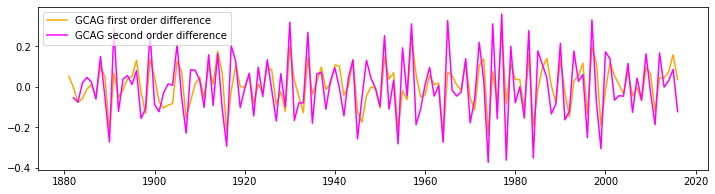

In [34]:
plt.plot(df.index, df.GCAG_diff1, label='GCAG first order difference', color='orange')
plt.plot(df.index, df.GCAG_diff2, label='GCAG second order difference', color='magenta')
plt.legend(loc='upper left')
plt.show()

The differencing gets the mean around zero

## Moving Average

![img](img/MA.png)

Al, A2, ... are the values. n is the window (four years, three quarters, etc)

`rolling()`  [rolling here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)

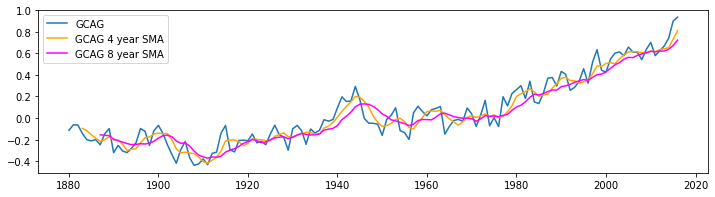

In [35]:
rolling_mean = df.GCAG.rolling(window=4).mean()
rolling_mean2 = df.GCAG.rolling(window=8).mean()
plt.plot(df.index, df.GCAG, label = 'GCAG')
plt.plot(df.index, rolling_mean, label='GCAG 4 year SMA', color='orange')
plt.plot(df.index, rolling_mean2, label='GCAG 8 year SMA', color='magenta')
plt.legend(loc='upper left')
plt.show()

### Exercise: How strongly do these measurements correlate contemporaneously? What about with a time lag?

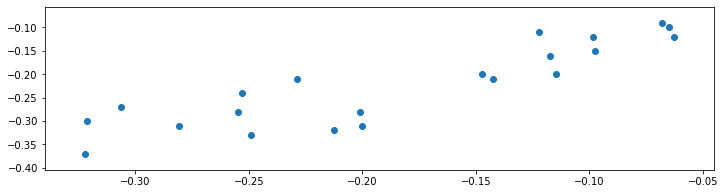

In [36]:
plt.scatter(df['1880':'1900'][['GCAG']], df['1880':'1900'][['GISTEMP']])

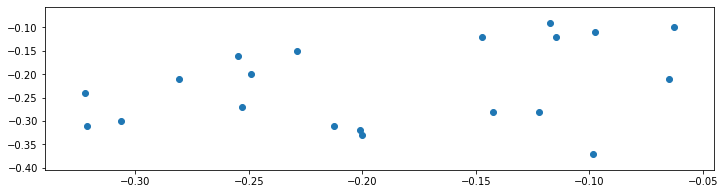

In [37]:
plt.scatter(df['1880':'1899'][['GCAG']], df['1881':'1900'][['GISTEMP']])

In [39]:
pearsonr(df['1880':'1900'].GCAG, df['1880':'1900'].GISTEMP)

(0.8821475863200064, 1.2374019789465504e-07)

In [38]:
pearsonr(df['1880':'1899'].GCAG, df['1881':'1900'].GISTEMP)

(0.345481359365847, 0.1357146858328232)

In [40]:
df['1880':'1899'][['GCAG']].head()

Source,GCAG
Year,
1880-01-01,-0.1148
1881-01-01,-0.0628
1882-01-01,-0.0648
1883-01-01,-0.1424
1884-01-01,-0.2009


In [41]:
df['1881':'1900'][['GISTEMP']].head()

Source,GISTEMP
Year,
1881-01-01,-0.12
1882-01-01,-0.10
1883-01-01,-0.21
1884-01-01,-0.28
1885-01-01,-0.32


In [46]:
df.columns

Index(['GCAG', 'GISTEMP', 'GISTEMP_log', 'GCAG_log', 'GCAG_lag1',
       'GISTEMP_lag1', 'GCAG_lag2', 'GCAG_lag3', 'GCAG_lag4', 'GCAG_diff1',
       'GISTEMP_diff1', 'GCAG_diff2', 'GISTEMP_diff2'],
      dtype='object', name='Source')

In [47]:
df[["GCAG", "GCAG_log", "GCAG_lag1", "GCAG_lag2", "GCAG_lag3", "GCAG_lag4", "GISTEMP",
    "GISTEMP_log"]].corr()

Source,GCAG,GCAG_log,GCAG_lag1,GCAG_lag2,GCAG_lag3,GCAG_lag4,GISTEMP,GISTEMP_log
Source,,,,,,,,
GCAG,1.000000,0.862998,0.946235,0.911005,0.898884,0.898513,0.996550,0.891128
GCAG_log,0.862998,1.000000,0.816302,0.746352,0.761746,0.798664,0.852812,0.989765
GCAG_lag1,0.946235,0.816302,1.000000,0.942859,0.907034,0.895385,0.945491,0.836837
GCAG_lag2,0.911005,0.746352,0.942859,1.000000,0.940571,0.903916,0.908704,0.836633
GCAG_lag3,0.898884,0.761746,0.907034,0.940571,1.000000,0.938279,0.897719,0.815906
GCAG_lag4,0.898513,0.798664,0.895385,0.903916,0.938279,1.000000,0.899783,0.815780
GISTEMP,0.996550,0.852812,0.945491,0.908704,0.897719,0.899783,1.000000,0.889280
GISTEMP_log,0.891128,0.989765,0.836837,0.836633,0.815906,0.815780,0.889280,1.000000


In [42]:
min(df.index)

Timestamp('1880-01-01 00:00:00')

In [43]:
max(df.index)

Timestamp('2016-01-01 00:00:00')

### References:

- [Duke resource on differencing](https://people.duke.edu/~rnau/411diff.htm)
- [Scipy talk on time series](https://www.youtube.com/watch?v=v5ijNXvlC5A)
- [Aileen Nielson book](https://www.oreilly.com/library/view/practical-time-series/9781492041641/)

### Check Objectives


In [131]:
monthly = pd.read_csv('data/monthly_csv.csv')

In [45]:
monthly.head()

,Source,Date,Mean
0,GCAG,2016-12-06,0.7895
1,GISTEMP,2016-12-06,0.8100
2,GCAG,2016-11-06,0.7504
3,GISTEMP,2016-11-06,0.9300
4,GCAG,2016-10-06,0.7292


In [48]:
monthly.dtypes

Source     object
Date       object
Mean      float64
dtype: object

In [132]:
monthly = monthly.pivot(index='Date', columns='Source', values='Mean')

In [50]:
monthly.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


In [51]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1644 entries, 1880-01-06 to 2016-12-06
Data columns (total 2 columns):
GCAG       1644 non-null float64
GISTEMP    1644 non-null float64
dtypes: float64(2)
memory usage: 38.5+ KB


In [133]:
monthly.index = pd.to_datetime(monthly.index, format='%Y/%m/%d')

In [56]:
monthly.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1644 entries, 1880-01-06 to 2016-12-06
Data columns (total 2 columns):
GCAG       1644 non-null float64
GISTEMP    1644 non-null float64
dtypes: float64(2)
memory usage: 38.5 KB


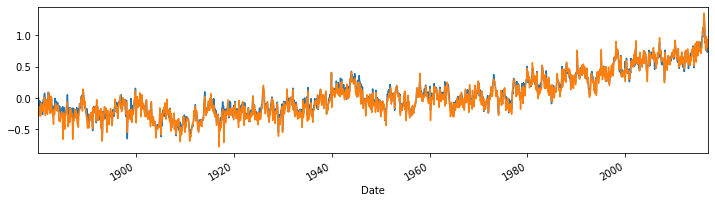

In [59]:
monthly.GCAG.plot()
monthly.GISTEMP.plot()

In [60]:
monthly.head()

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14


In [61]:
monthly['1880']

Source,GCAG,GISTEMP
Date,,
1880-01-06,0.0009,-0.30
1880-02-06,-0.1229,-0.21
1880-03-06,-0.1357,-0.18
1880-04-06,-0.0499,-0.27
1880-05-06,-0.0738,-0.14
1880-06-06,-0.1692,-0.29
1880-07-06,-0.1491,-0.24
1880-08-06,-0.0725,-0.08
1880-09-06,-0.0817,-0.17


In [71]:
monthly.tail()

Source,GCAG,GISTEMP
Date,,
2016-08-06,0.8998,0.98
2016-09-06,0.8767,0.87
2016-10-06,0.7292,0.89
2016-11-06,0.7504,0.93
2016-12-06,0.7895,0.81


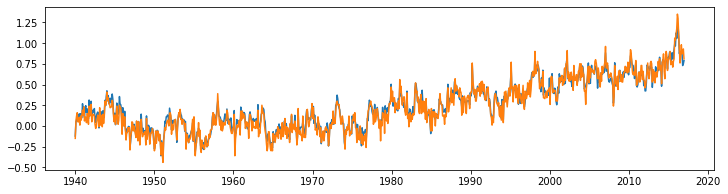

In [109]:
plt.plot(monthly['1940':'2017'][['GCAG', 'GISTEMP']])

In [134]:
monthly_log = monthly
monthly_log['GISTEMP_log'] = np.log(monthly_log.GISTEMP)
monthly_log['GCAG_log'] = np.log(monthly_log.GCAG)

C:\Users\Rocio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  
C:\Users\Rocio\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log
  
C:\Users\Rocio\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until


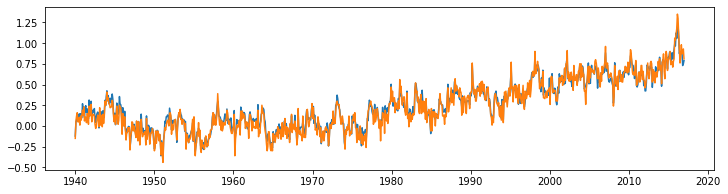

In [117]:
plt.plot(monthly['1940':'2017'][['GCAG', 'GISTEMP']])

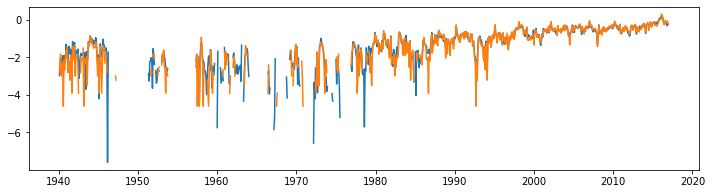

In [118]:
plt.plot(monthly['1940':'2017'][['GCAG_log', 'GISTEMP_log']])

In [119]:
monthly[list(monthly.columns)].corr()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log
Source,,,,
GCAG,1.000000,0.985074,0.866237,0.836027
GISTEMP,0.985074,1.000000,0.885533,0.817148
GISTEMP_log,0.866237,0.885533,1.000000,0.885079
GCAG_log,0.836027,0.817148,0.885079,1.000000


In [135]:
monthly_lag = monthly
monthly_lag['GCAG_lag1'] = monthly_lag.GCAG.shift()
monthly_lag['GCAG_lag2'] = monthly_lag.GCAG.shift(2)
monthly_lag['GCAG_lag3'] = monthly_lag.GCAG.shift(3)
monthly_lag['GISTEMP_lag1'] = monthly_lag.GISTEMP.shift()
monthly_lag['GISTEMP_lag2'] = monthly_lag.GISTEMP.shift(2)
monthly_lag['GISTEMP_lag3'] = monthly_lag.GISTEMP.shift(3)

In [136]:
monthly_lag[list(monthly_lag.columns)].corr()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GCAG_lag2,GCAG_lag3,GISTEMP_lag1,GISTEMP_lag2,GISTEMP_lag3
Source,,,,,,,,,,
GCAG,1.000000,0.985074,0.866237,0.836027,0.948807,0.932787,0.921505,0.937638,0.922008,0.908748
GISTEMP,0.985074,1.000000,0.885533,0.817148,0.937216,0.923114,0.910765,0.935732,0.916796,0.900754
GISTEMP_log,0.866237,0.885533,1.000000,0.885079,0.809358,0.801340,0.775762,0.797019,0.787345,0.770402
GCAG_log,0.836027,0.817148,0.885079,1.000000,0.780860,0.778263,0.766516,0.759503,0.759822,0.753526
GCAG_lag1,0.948807,0.937216,0.809358,0.780860,1.000000,0.948658,0.932601,0.985027,0.937449,0.921754
GCAG_lag2,0.932787,0.923114,0.801340,0.778263,0.948658,1.000000,0.948517,0.937032,0.985046,0.937281
GCAG_lag3,0.921505,0.910765,0.775762,0.766516,0.932601,0.948517,1.000000,0.922900,0.936905,0.985055
GISTEMP_lag1,0.937638,0.935732,0.797019,0.759503,0.985027,0.937032,0.922900,1.000000,0.935531,0.916518
GISTEMP_lag2,0.922008,0.916796,0.787345,0.759822,0.937449,0.985046,0.936905,0.935531,1.000000,0.935271


In [137]:
monthly['GCAG_lag1'] = monthly.GCAG.shift()
monthly['GCAG_lag2'] = monthly.GCAG.shift(2)
monthly['GCAG_lag3'] = monthly.GCAG.shift(3)
monthly['GISTEMP_lag1'] = monthly.GISTEMP.shift()
monthly['GISTEMP_lag2'] = monthly.GISTEMP.shift(2)
monthly['GISTEMP_lag3'] = monthly.GISTEMP.shift(3)

In [138]:
monthly['GCAG_diff1']=monthly.GCAG.diff()
monthly['GISTEMP_diff1']=monthly.GISTEMP.diff()
monthly['GCAG_diff2']=monthly.GCAG_diff1.diff()
monthly['GISTEMP_diff2']=monthly.GISTEMP_diff1.diff()

In [139]:
monthly[list(monthly.columns)].corr()

Source,GCAG,GISTEMP,GISTEMP_log,GCAG_log,GCAG_lag1,GCAG_lag2,GCAG_lag3,GISTEMP_lag1,GISTEMP_lag2,GISTEMP_lag3,GCAG_diff1,GISTEMP_diff1,GCAG_diff2,GISTEMP_diff2
Source,,,,,,,,,,,,,,
GCAG,1.000000,0.985074,0.866237,0.836027,0.948807,0.932787,0.921505,0.937638,0.922008,0.908748,0.164755,0.136382,0.067186,0.053625
GISTEMP,0.985074,1.000000,0.885533,0.817148,0.937216,0.923114,0.910765,0.935732,0.916796,0.900754,0.154858,0.182828,0.064689,0.076388
GISTEMP_log,0.866237,0.885533,1.000000,0.885079,0.809358,0.801340,0.775762,0.797019,0.787345,0.770402,0.010445,0.047906,0.012751,0.035194
GCAG_log,0.836027,0.817148,0.885079,1.000000,0.780860,0.778263,0.766516,0.759503,0.759822,0.753526,0.038240,0.050365,0.039366,0.043375
GCAG_lag1,0.948807,0.937216,0.809358,0.780860,1.000000,0.948658,0.932601,0.985027,0.937449,0.921754,-0.155220,-0.129809,-0.195108,-0.162724
GCAG_lag2,0.932787,0.923114,0.801340,0.778263,0.948658,1.000000,0.948517,0.937032,0.985046,0.937281,-0.045242,-0.035053,0.067534,0.056931
GCAG_lag3,0.921505,0.910765,0.775762,0.766516,0.932601,0.948517,1.000000,0.922900,0.936905,0.985055,-0.030412,-0.030045,0.009369,0.002312
GISTEMP_lag1,0.937638,0.935732,0.797019,0.759503,0.985027,0.937032,0.922900,1.000000,0.935531,0.916518,-0.143392,-0.175690,-0.182222,-0.218712
GISTEMP_lag2,0.922008,0.916796,0.787345,0.759822,0.937449,0.985046,0.936905,0.935531,1.000000,0.935271,-0.043950,-0.048504,0.061226,0.076583


In [140]:
monthly = monthly.drop(columns = ["GISTEMP_log", "GCAG_log"])

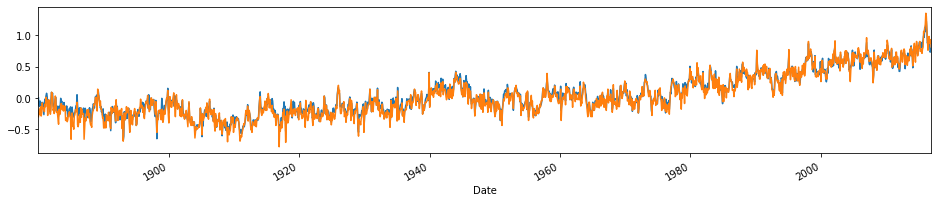

In [143]:
monthly.GCAG.plot()
monthly.GISTEMP.plot()

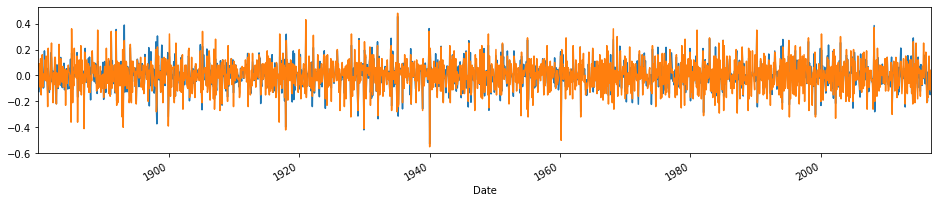

In [144]:
monthly.GCAG_diff1.plot()
monthly.GISTEMP_diff1.plot()

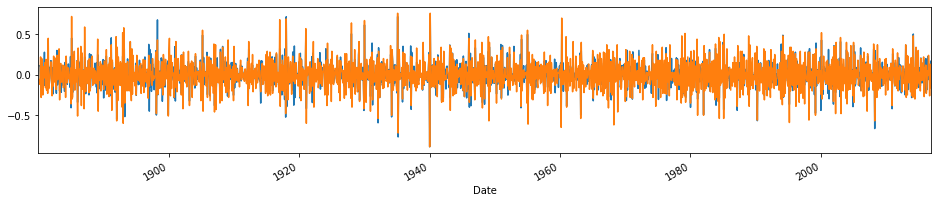

In [145]:
monthly.GCAG_diff2.plot()
monthly.GISTEMP_diff2.plot()

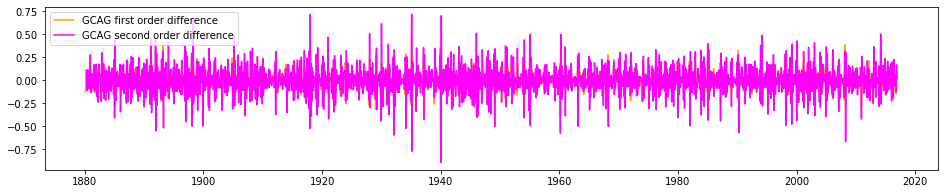

In [146]:
plt.plot(monthly.index, monthly.GCAG_diff1, label='GCAG first order difference', color='orange')
plt.plot(monthly.index, monthly.GCAG_diff2, label='GCAG second order difference', color='magenta')
plt.legend(loc='upper left')
plt.show()

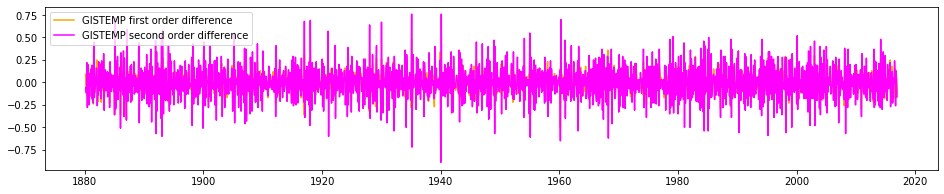

In [147]:
plt.plot(monthly.index, monthly.GISTEMP_diff1, label='GISTEMP first order difference', color='orange')
plt.plot(monthly.index, monthly.GISTEMP_diff2, label='GISTEMP second order difference', color='magenta')
plt.legend(loc='upper left')
plt.show()

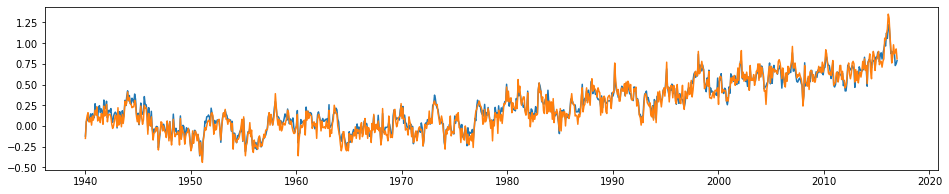

In [148]:
plt.plot(monthly['1940':'2017'][['GCAG', 'GISTEMP']])

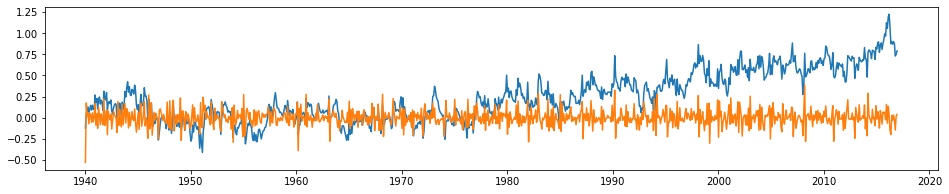

In [150]:
plt.plot(monthly['1940':'2017'][['GCAG', 'GCAG_diff1']])

In [159]:
monthly['rolling_mean'] = monthly.GCAG.rolling(window=4).mean()
monthly['rolling_mean2'] = monthly.GCAG.rolling(window=8).mean()

In [161]:
monthly.head()

Source,GCAG,GISTEMP,GCAG_lag1,GCAG_lag2,GCAG_lag3,GISTEMP_lag1,GISTEMP_lag2,GISTEMP_lag3,GCAG_diff1,GISTEMP_diff1,GCAG_diff2,GISTEMP_diff2,rolling_mean,rolling_mean2
Date,,,,,,,,,,,,,,
1880-01-06,0.0009,-0.30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1880-02-06,-0.1229,-0.21,0.0009,NaN,NaN,-0.30,NaN,NaN,-0.1238,0.09,NaN,NaN,NaN,NaN
1880-03-06,-0.1357,-0.18,-0.1229,0.0009,NaN,-0.21,-0.30,NaN,-0.0128,0.03,0.1110,-0.06,NaN,NaN
1880-04-06,-0.0499,-0.27,-0.1357,-0.1229,0.0009,-0.18,-0.21,-0.30,0.0858,-0.09,0.0986,-0.12,-0.076900,NaN
1880-05-06,-0.0738,-0.14,-0.0499,-0.1357,-0.1229,-0.27,-0.18,-0.21,-0.0239,0.13,-0.1097,0.22,-0.095575,NaN


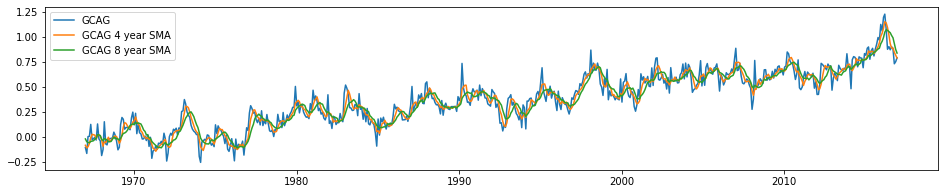

In [165]:
plt.plot(monthly['1967':'2017'][['GCAG']], label='GCAG')
plt.plot(monthly['1967':'2017'][['rolling_mean']], label='GCAG 4 year SMA')
plt.plot(monthly['1967':'2017'][['rolling_mean2']], label='GCAG 8 year SMA')
plt.legend(loc='upper left')
plt.show()

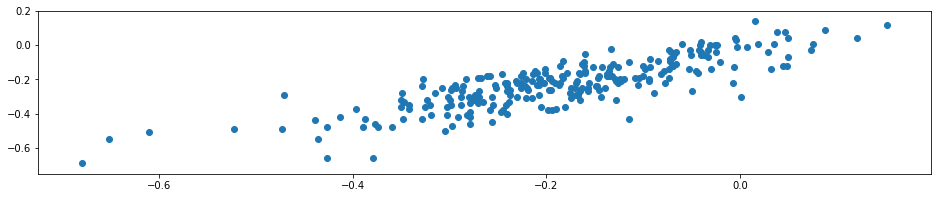

In [166]:
plt.scatter(monthly['1880':'1900'][['GCAG']], monthly['1880':'1900'][['GISTEMP']])

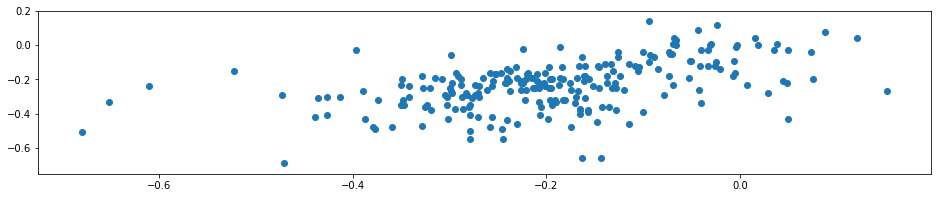

In [174]:
plt.scatter(monthly['1881-01-06':'1899-12-06'][['GCAG']], monthly['1881-02-06':'1900-01-06'][['GISTEMP']])

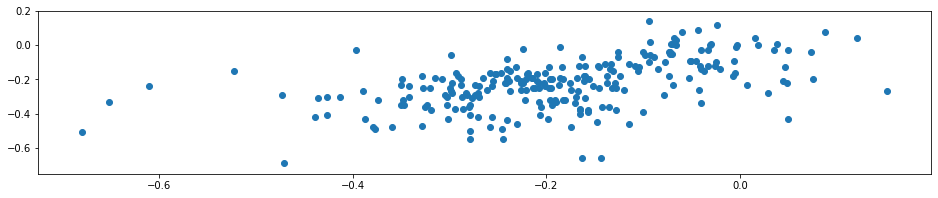

In [175]:
plt.scatter(monthly['1881':'1900'][['GCAG_lag1']], monthly['1881':'1900'][['GISTEMP']])

In [176]:
pearsonr(monthly['1880':'1900'].GCAG, monthly['1880':'1900'].GISTEMP)

(0.8373775278912141, 1.5894725243752522e-67)

In [177]:
pearsonr(monthly['1880':'1899'].GCAG, monthly['1881':'1900'].GISTEMP)

(0.1546405732961276, 0.016502234730950686)

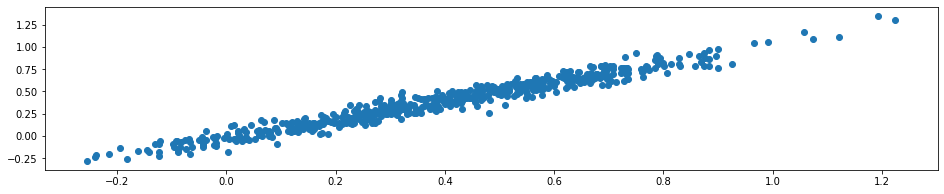

In [178]:
plt.scatter(monthly['1970':'2017'][['GCAG']], monthly['1970':'2017'][['GISTEMP']])

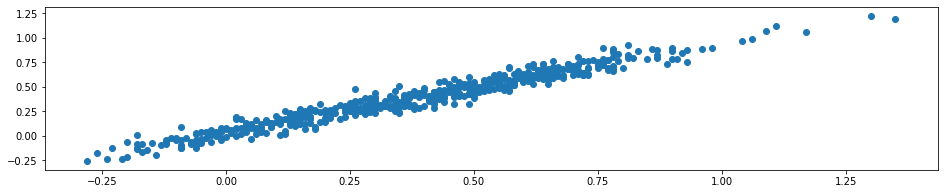

In [179]:
plt.scatter(monthly['1970':'2017'][['GISTEMP']], monthly['1970':'2017'][['GCAG']])

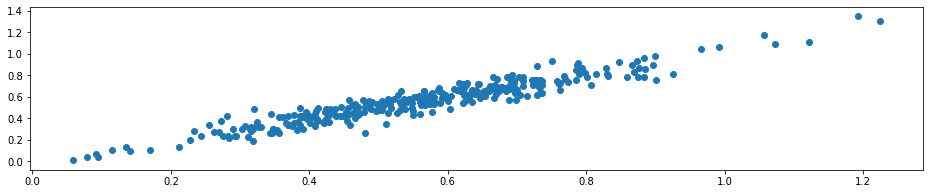

In [180]:
plt.scatter(monthly['1990':'2017'][['GCAG']], monthly['1990':'2017'][['GISTEMP']])

In [187]:
pearsonr(monthly['1990':'2017'].GCAG, monthly['1990':'2017'].GISTEMP)

(0.9559508776411728, 1.7768093822643933e-173)

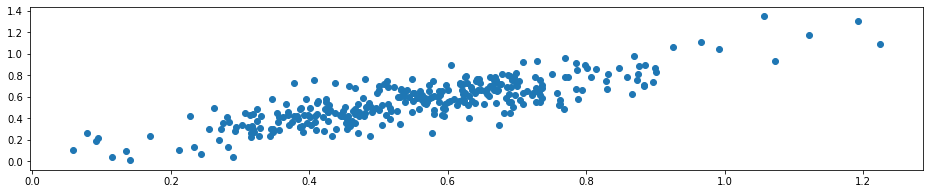

In [181]:
plt.scatter(monthly['1990':'2017'][['GCAG_lag1']], monthly['1990':'2017'][['GISTEMP']])

In [188]:
pearsonr(monthly['1990':'2017'].GCAG_lag1, monthly['1990':'2017'].GISTEMP)

(0.8291457917466024, 2.5301788063429625e-83)

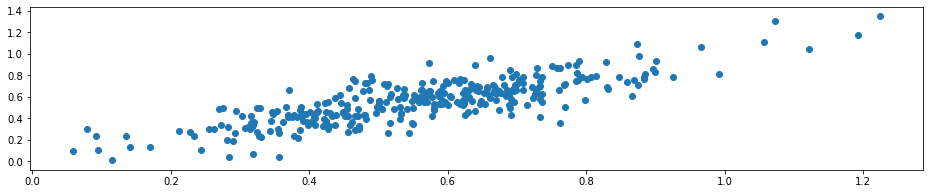

In [182]:
plt.scatter(monthly['1990':'2017'][['GCAG']], monthly['1990':'2017'][['GISTEMP_lag1']])

In [189]:
pearsonr(monthly['1990':'2017'].GCAG, monthly['1990':'2017'].GISTEMP_lag1)

(0.8233251802012292, 3.3551620745978e-81)

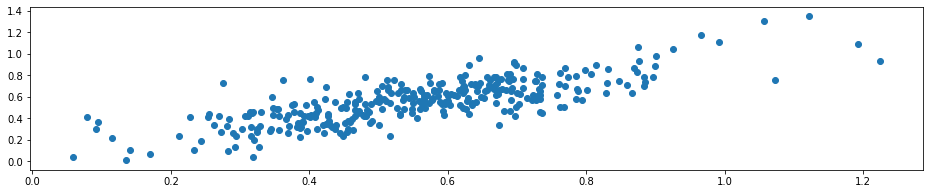

In [183]:
plt.scatter(monthly['1990':'2017'][['GCAG_lag2']], monthly['1990':'2017'][['GISTEMP']])

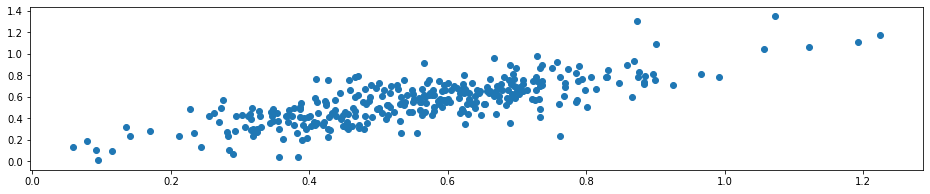

In [184]:
plt.scatter(monthly['1990':'2017'][['GCAG']], monthly['1990':'2017'][['GISTEMP_lag2']])

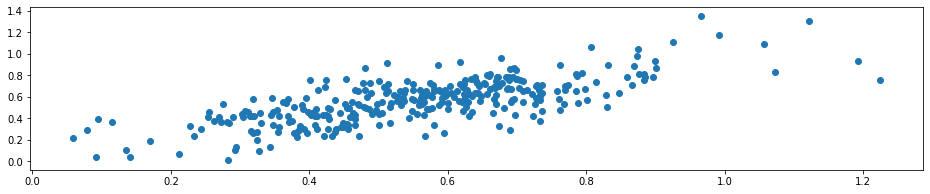

In [185]:
plt.scatter(monthly['1990':'2017'][['GCAG_lag3']], monthly['1990':'2017'][['GISTEMP']])

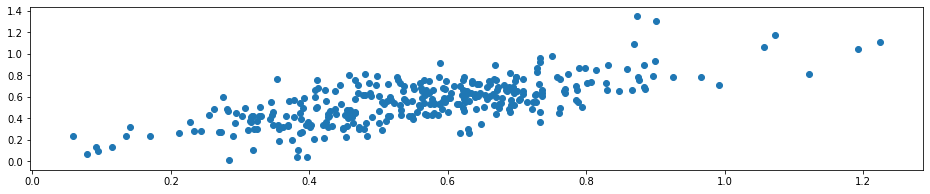

In [186]:
plt.scatter(monthly['1990':'2017'][['GCAG']], monthly['1990':'2017'][['GISTEMP_lag3']])